In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageOps
from PIL import ImageOps

df = pd.read_csv("NBAChampion.csv")
df.head()


,Season,Team/Season,Team,Team ID,Team ID/Season,Conference,Conference/Season,Conference 5=> rec,Conference OR,Conference SRS,...,3PAr,TS%,Offense Four Factors|eFG%,Offense Four Factors|TOV%,Offense Four Factors|ORB%,Offense Four Factors|FT/FGA,Defense Four Factors|eFG%,Defense Four Factors|TOV%,Defense Four Factors|DRB%,Defense Four Factors|FT/FGA
0,2024,Indiana Pacers 2024,Indiana Pacers,29,29 2024,East,East 2024,0.472976,0.471545,-0.981333,...,0.380,0.606,0.578,11.3,23.8,0.173,0.556,12.1,74.1,0.228
1,2024,Boston Celtics 2024,Boston Celtics,6,6 2024,East,East 2024,0.472976,0.471545,-0.981333,...,0.471,0.609,0.578,10.8,24.9,0.180,0.523,10.8,76.3,0.145
2,2024,Oklahoma City Thunder 2024,Oklahoma City Thunder,26,26 2024,West,West 2024,0.524224,0.528455,0.981333,...,0.383,0.608,0.573,11.4,21.1,0.198,0.530,13.6,73.8,0.202
3,2024,Milwaukee Bucks 2024,Milwaukee Bucks,3,3 2024,East,East 2024,0.472976,0.471545,-0.981333,...,0.430,0.601,0.568,11.5,21.8,0.209,0.539,10.6,77.2,0.189
4,2024,Atlanta Hawks 2024,Atlanta Hawks,22,22 2024,East,East 2024,0.472976,0.471545,-0.981333,...,0.408,0.576,0.539,11.6,27.1,0.200,0.572,12.4,75.2,0.192


In [3]:
df = pd.read_csv("NBAChampion.csv")

exclude_columns = ['Season','Team/Season','Team','Team ID','Team ID/Season','Conference','Conference/Season','make playoffs','champion share','pre playoff odds rank',
                  'champion','top 3 conference','rk conference','curr/past mvp or past fmvp']

reverse_rank_columns = ['pre season odds', 'DRtg']

for col in df.columns:
    if col not in exclude_columns:
        if col in reverse_rank_columns:
            df[col] = df.groupby('Season')[col].rank(method='min', ascending=True)
        else:
            df[col] = df.groupby('Season')[col].rank(method='min', ascending=False)

df.to_csv("NBA Champion LR Data.csv", index=False)

In [4]:
df= pd.read_csv("NBA Champion LR Data.csv")
print(list(df.columns))

['Season', 'Team/Season', 'Team', 'Team ID', 'Team ID/Season', 'Conference', 'Conference/Season', 'Conference 5=> rec', 'Conference OR', 'Conference SRS', 'Conference Age', 'pre playoff odds', 'pre playoff odds rank', 'pre season odds', 'champion', 'champion share', 'make playoffs', 'top 3 conference', 'rk conference', 'overall record', 'over500 rec', 'over600 rec', '20 =< wins', '5 => rec', 'sum coach playoff games', 'sum coy shares', 'sum playoff games', 'sum champion', 'sum champion share', 'sum mvp shares', 'sum all defense', 'sum all nba', 'sum dpoy shares', 'sum smoy shares', 'sum mip shares', 'sum all stars', 'sum player L1Y cs', 'sum player L3Y cs', 'sum player L5Y cs', 'sum player L8Y cs', 'sum player L10Y cs', 'sum L3Y mvp shares ', 'sum L5Y  mvp shares', 'sum franchise L1Y cs', 'sum franchise L3Y cs', 'sum franchise L5Y cs', 'sum franchise L8Y cs', 'sum franchise L10Y cs', 'team_rating_custom', 'max_player_rating_custom', 'curr/past mvp or past fmvp', 'FG', 'FGA', 'FG%', '3P

<Axes: title={'center': 'Total 3-Point Attempts Each Season'}, xlabel='Season', ylabel='Total 3-Point Attempts'>

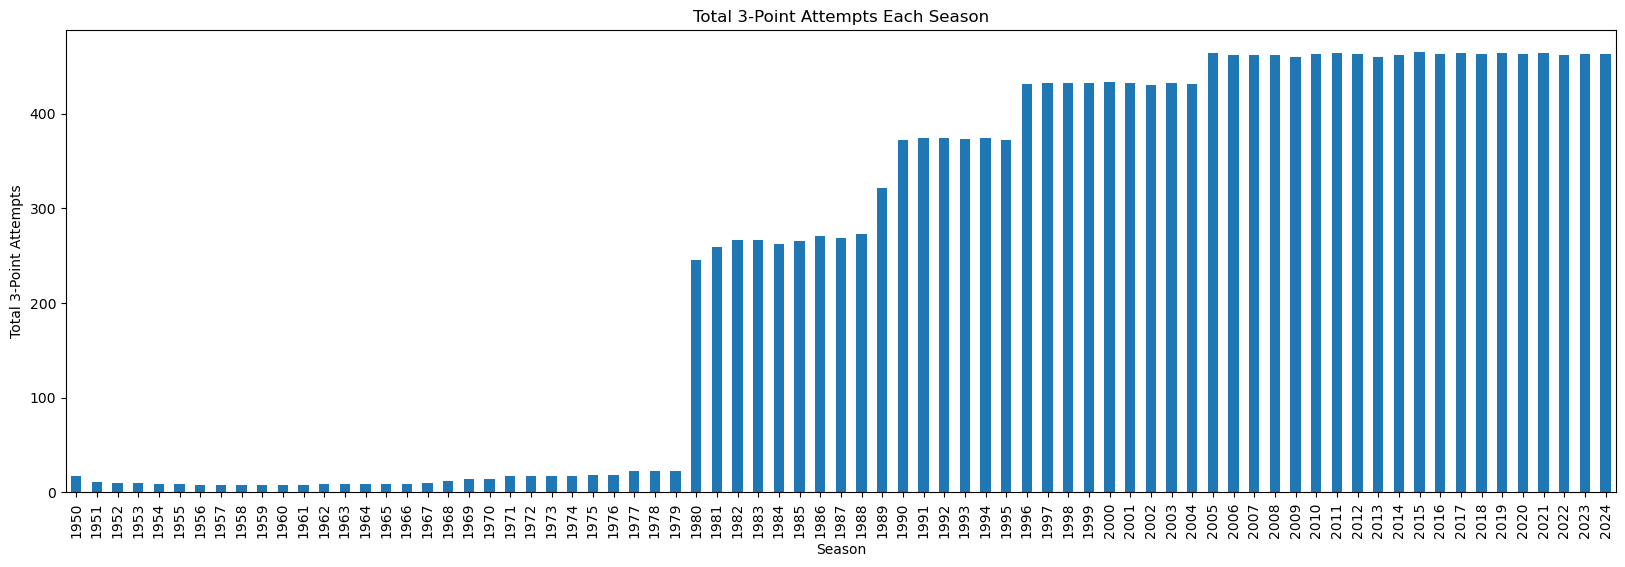

In [5]:
three_point_attempts_per_season = df.groupby('Season')['3PA'].sum()

plt.figure(figsize=(20, 6))

three_point_attempts_per_season.plot(kind='bar', xlabel='Season', ylabel='Total 3-Point Attempts', title='Total 3-Point Attempts Each Season')

In [6]:
df.drop(df[df['Season'] < 1980].index, inplace = True)
df

,Season,Team/Season,Team,Team ID,Team ID/Season,Conference,Conference/Season,Conference 5=> rec,Conference OR,Conference SRS,...,3PAr,TS%,Offense Four Factors|eFG%,Offense Four Factors|TOV%,Offense Four Factors|ORB%,Offense Four Factors|FT/FGA,Defense Four Factors|eFG%,Defense Four Factors|TOV%,Defense Four Factors|DRB%,Defense Four Factors|FT/FGA
0,2024,Indiana Pacers 2024,Indiana Pacers,29,29 2024,East,East 2024,16.0,16.0,16.0,...,20.0,3.0,1.0,25.0,19.0,24.0,8.0,17.0,26.0,1.0
1,2024,Boston Celtics 2024,Boston Celtics,6,6 2024,East,East 2024,16.0,16.0,16.0,...,1.0,1.0,1.0,29.0,12.0,21.0,29.0,29.0,11.0,30.0
2,2024,Oklahoma City Thunder 2024,Oklahoma City Thunder,26,26 2024,West,West 2024,1.0,1.0,1.0,...,18.0,2.0,3.0,24.0,27.0,13.0,27.0,2.0,29.0,8.0
3,2024,Milwaukee Bucks 2024,Milwaukee Bucks,3,3 2024,East,East 2024,16.0,16.0,16.0,...,4.0,5.0,4.0,22.0,25.0,7.0,21.0,30.0,5.0,18.0
4,2024,Atlanta Hawks 2024,Atlanta Hawks,22,22 2024,East,East 2024,16.0,16.0,16.0,...,9.0,18.0,17.0,20.0,5.0,11.0,1.0,11.0,19.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,1980,Denver Nuggets 1980,Denver Nuggets,1,1 1980,West,West 1980,12.0,12.0,12.0,...,8.0,21.0,19.0,15.0,10.0,8.0,10.0,17.0,7.0,14.0
1250,1980,Chicago Bulls 1980,Chicago Bulls,9,9 1980,West,West 1980,12.0,12.0,12.0,...,5.0,6.0,9.0,1.0,16.0,1.0,4.0,11.0,4.0,6.0
1251,1980,Utah Jazz 1980,Utah Jazz,20,20 1980,West,West 1980,12.0,12.0,12.0,...,11.0,5.0,4.0,4.0,22.0,10.0,4.0,21.0,9.0,9.0
1252,1980,Golden State Warriors 1980,Golden State Warriors,8,8 1980,West,West 1980,12.0,12.0,12.0,...,18.0,16.0,11.0,10.0,19.0,22.0,8.0,12.0,1.0,2.0


In [7]:
data_columns = ['Conference 5=> rec', 'pre playoff odds rank', 'pre season odds', 'champion share','top 3 conference', 'rk conference',
                'overall record', 'over500 rec', 'over600 rec', '20 =< wins', '5 => rec', 'sum coach playoff games', 'sum coy shares', 'sum playoff games', 'sum champion', 'sum champion share', 
                'sum mvp shares', 'sum all defense', 'sum all nba', 'sum dpoy shares', 'sum smoy shares', 'sum mip shares', 'sum all stars', 'sum player L1Y cs', 'sum player L3Y cs', 
                'sum player L5Y cs', 'sum player L8Y cs', 'sum player L10Y cs', 'sum L3Y mvp shares ', 'sum L5Y  mvp shares', 'sum franchise L1Y cs', 'sum franchise L3Y cs',
                'sum franchise L5Y cs', 'sum franchise L8Y cs', 'sum franchise L10Y cs', 'team_rating_custom', 'max_player_rating_custom', 'curr/past mvp or past fmvp', 
                'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG_opp', 
                'FGA_opp', 'FG%_opp', '3P_opp', '3PA_opp', '3P%_opp', '2P_opp', '2PA_opp', '2P%_opp', 'FT_opp', 'FTA_opp', 'FT%_opp', 'ORB_opp', 'DRB_opp', 'TRB_opp',
                'AST_opp', 'STL_opp', 'BLK_opp', 'TOV_opp', 'PF_opp', 'PTS_opp', 'Age', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'ORtg', 'DRtg', 'NRtg', 'Pace', 
                'FTr', '3PAr', 'TS%', 'Offense Four Factors|eFG%', 'Offense Four Factors|TOV%', 'Offense Four Factors|ORB%', 'Offense Four Factors|FT/FGA',
                'Defense Four Factors|eFG%', 'Defense Four Factors|TOV%', 'Defense Four Factors|DRB%', 'Defense Four Factors|FT/FGA']

df= df.dropna(subset=data_columns)
data = df[data_columns].copy()

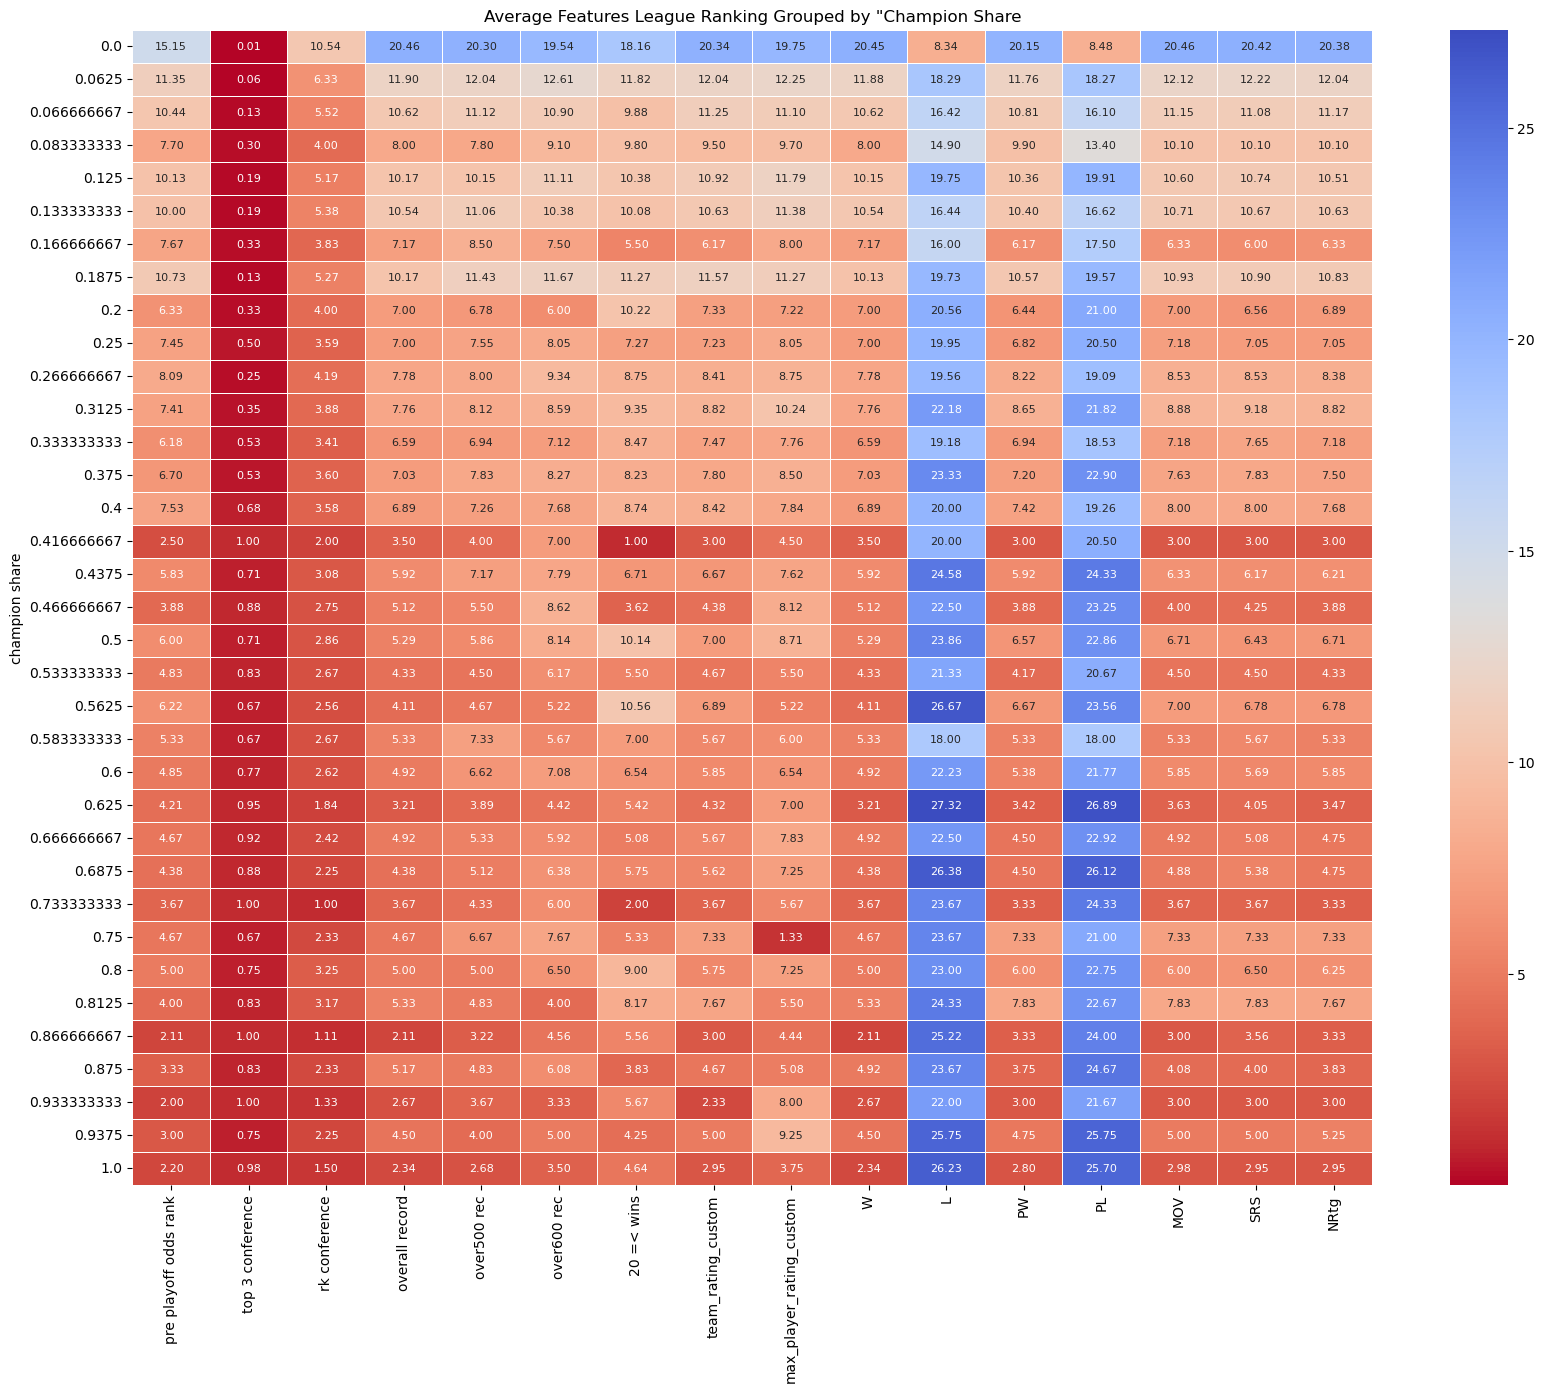

In [8]:
#HeatMap
corr = data.corr().abs()
corr

select_features = corr.loc[corr['champion share']>.5].index
corr_df = data[select_features].groupby('champion share').mean()

plt.rcParams['figure.figsize'] = (20, 15)
plt.title('Average Features League Ranking Grouped by "Champion Share')
sns.heatmap(data=corr_df, cmap='coolwarm_r', annot=True, linewidths=.5, annot_kws={"size": 8}, fmt=".2f")

plt.show()

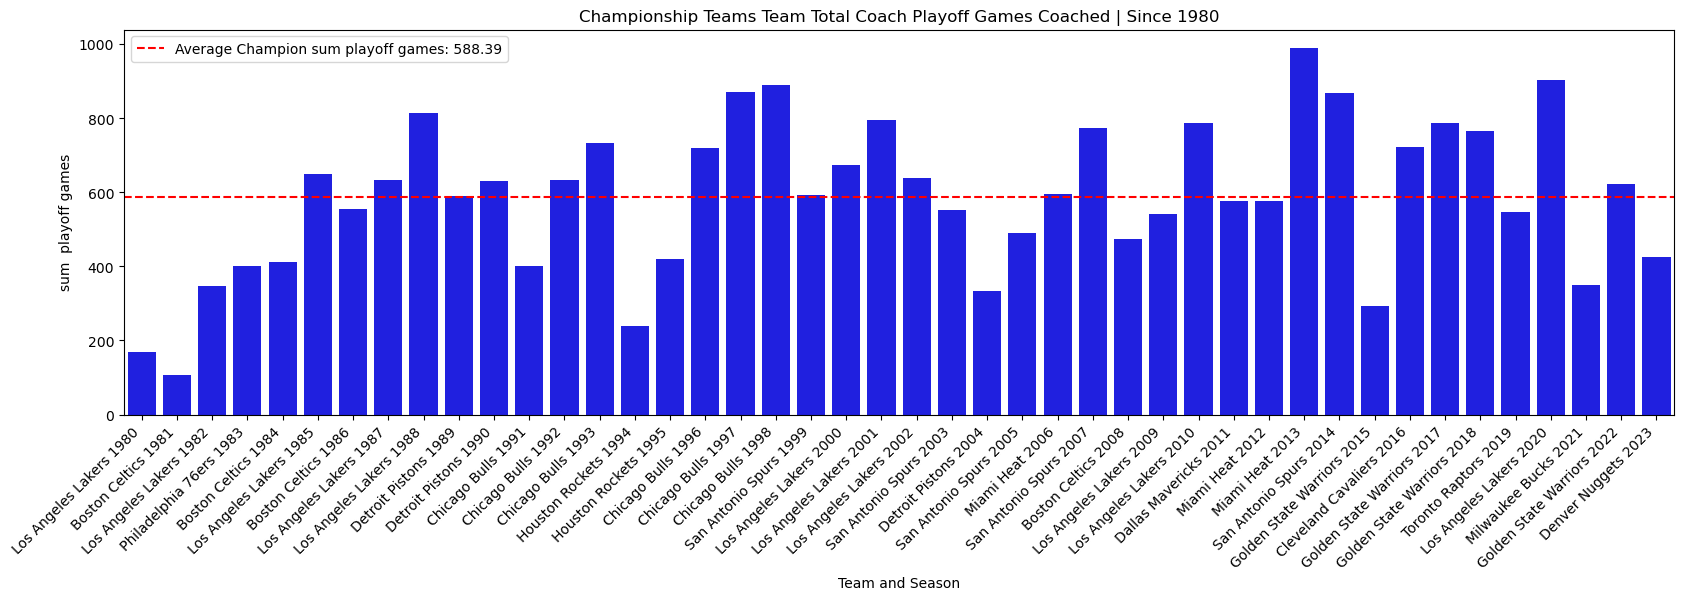

In [9]:
#Chart
df = pd.read_csv("NBAChampion.csv")
df.drop(df[df['Season'] < 1980].index, inplace = True)


champion_sea = df.loc[df['champion share'] == 1].copy()  

champion_sea.sort_values(by='Season', inplace=True)

champion_sea['Season'] = champion_sea['Season'].astype(str)

champion_sea['team_season'] = champion_sea['Team'] + ' ' + champion_sea['Season']

plt.figure(figsize=(20, 5))
plt.title("Championship Teams Team Total Coach Playoff Games Coached | Since 1980")

sns.barplot(x=champion_sea['team_season'], y=champion_sea['sum playoff games'], color='blue')

average_mvp = champion_sea['sum playoff games'].mean()

plt.axhline(y=average_mvp, color='r', linestyle='--', label=f'Average Champion sum playoff games: {average_mvp:.2f}')

plt.xlabel('Team and Season')
plt.ylabel('sum  playoff games')
plt.xticks(rotation=45, ha='right')
plt.legend().set_visible(True)

plt.savefig("NBA_spg_chps", bbox_inches='tight', pad_inches=0.1)
image = Image.open("NBA_CPG_chps.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("NBA_CPG_chps.png")

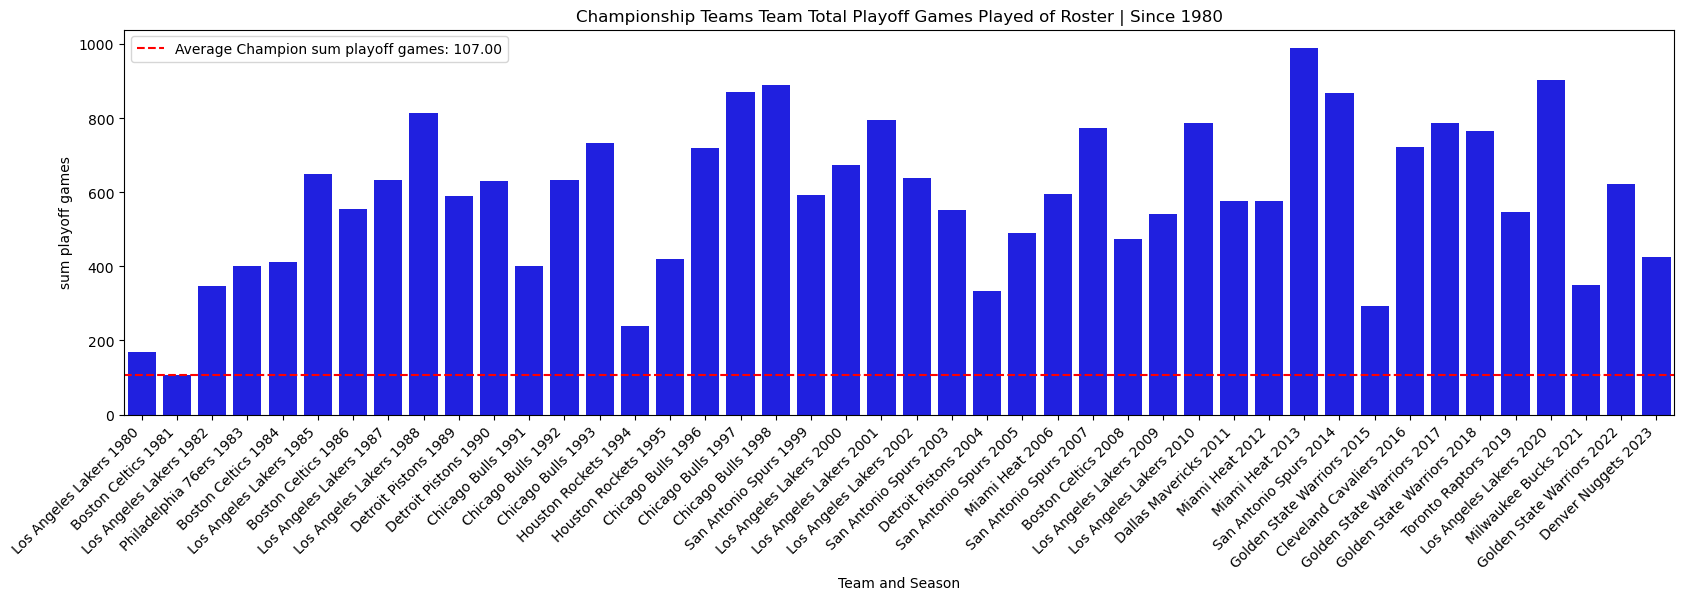

In [10]:
#df = pd.read_csv("NBA Champion LR Data.csv")
df = pd.read_csv("NBAChampion.csv")
df.drop(df[df['Season'] < 1980].index, inplace = True)


champion_sea = df.loc[df['champion share'] == 1].copy()  

champion_sea.sort_values(by='Season', inplace=True)

champion_sea['Season'] = champion_sea['Season'].astype(str)

champion_sea['team_season'] = champion_sea['Team'] + ' ' + champion_sea['Season']

###############################################
# Change this info
###############################################

plt.figure(figsize=(20, 5))
plt.title("Championship Teams Team Total Playoff Games Played of Roster | Since 1980")

sns.barplot(x=champion_sea['team_season'], y=champion_sea['sum playoff games'], color='blue')

average_mvp = champion_sea['sum playoff games'].min()

plt.axhline(y=average_mvp, color='r', linestyle='--', label=f'Average Champion sum playoff games: {average_mvp:.2f}')

plt.xlabel('Team and Season')
plt.ylabel('sum playoff games')
plt.xticks(rotation=45, ha='right')
plt.legend().set_visible(True)

plt.savefig("NBA_spg_min_chps", bbox_inches='tight', pad_inches=0.1)
image = Image.open("NBA_spg_min_chps.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("NBA_spg_min_chps.png")

plt.show()

In [11]:
df.shape
#1254 rows and 116 columns

(1254, 116)

In [12]:
df.info

<bound method DataFrame.info of       Season                 Team/Season                   Team  Team ID  \
0       2024         Indiana Pacers 2024         Indiana Pacers       29   
1       2024         Boston Celtics 2024         Boston Celtics        6   
2       2024  Oklahoma City Thunder 2024  Oklahoma City Thunder       26   
3       2024        Milwaukee Bucks 2024        Milwaukee Bucks        3   
4       2024          Atlanta Hawks 2024          Atlanta Hawks       22   
...      ...                         ...                    ...      ...   
1249    1980         Denver Nuggets 1980         Denver Nuggets        1   
1250    1980          Chicago Bulls 1980          Chicago Bulls        9   
1251    1980              Utah Jazz 1980              Utah Jazz       20   
1252    1980  Golden State Warriors 1980  Golden State Warriors        8   
1253    1980        Detroit Pistons 1980        Detroit Pistons       28   

     Team ID/Season Conference Conference/Season  Confe

In [13]:
df.isnull().sum()

Season                         0
Team/Season                    0
Team                           0
Team ID                        0
Team ID/Season                 0
                              ..
Offense Four Factors|FT/FGA    0
Defense Four Factors|eFG%      0
Defense Four Factors|TOV%      0
Defense Four Factors|DRB%      0
Defense Four Factors|FT/FGA    0
Length: 116, dtype: int64

In [14]:
df.dtypes

Season                           int64
Team/Season                     object
Team                            object
Team ID                          int64
Team ID/Season                  object
                                ...   
Offense Four Factors|FT/FGA    float64
Defense Four Factors|eFG%      float64
Defense Four Factors|TOV%      float64
Defense Four Factors|DRB%      float64
Defense Four Factors|FT/FGA    float64
Length: 116, dtype: object

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Season,1254.0,2003.124402,12.702646,1980.000000,1993.000000,2004.000000,2014.000000,2024.000000
Team ID,1254.0,16.634769,9.850953,1.000000,8.000000,18.000000,25.000000,35.000000
Conference 5=> rec,1254.0,0.499456,0.017673,0.463667,0.488405,0.499299,0.512033,0.538726
Conference OR,1254.0,0.500125,0.021944,0.452033,0.482927,0.500813,0.516630,0.548780
Conference SRS,1254.0,-0.004226,0.971289,-2.043333,-0.849167,-0.111429,0.813393,2.048667
...,...,...,...,...,...,...,...,...
Offense Four Factors|FT/FGA,1254.0,0.228457,0.030733,0.143000,0.206000,0.226500,0.250000,0.334000
Defense Four Factors|eFG%,1254.0,0.497270,0.024696,0.423000,0.480000,0.495000,0.512000,0.576000
Defense Four Factors|TOV%,1254.0,13.828549,1.380562,10.300000,12.900000,13.800000,14.700000,19.000000
Defense Four Factors|DRB%,1254.0,71.590271,4.058460,61.500000,68.300000,71.600000,74.800000,81.600000


<Axes: title={'center': 'Total Free Throw Attempts Each Season'}, xlabel='Season', ylabel='Free Throw Attempts'>

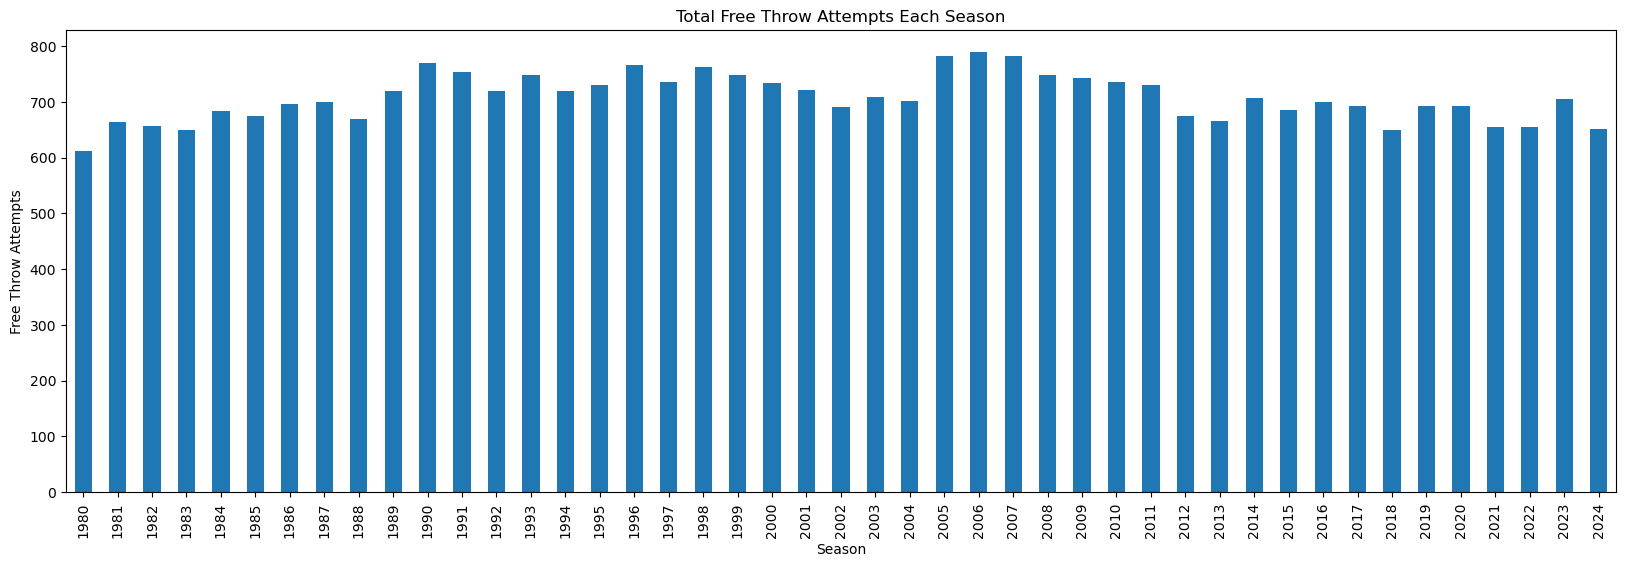

In [16]:
three_point_attempts_per_season = df.groupby('Season')['FTA'].sum()

plt.figure(figsize=(20, 6))

three_point_attempts_per_season.plot(kind='bar', xlabel='Season', ylabel='Free Throw Attempts', title='Total Free Throw Attempts Each Season')


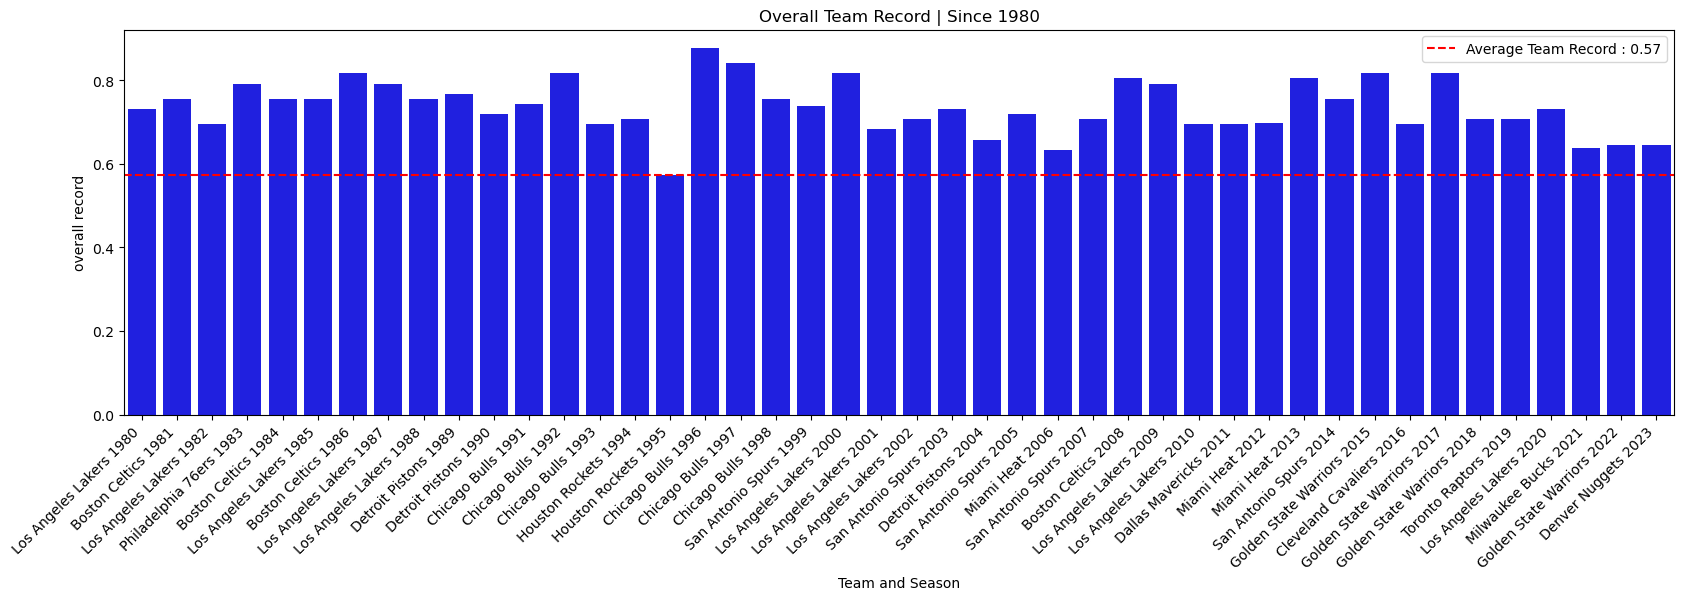

In [17]:
#df = pd.read_csv("NBA Champion LR Data.csv")
df = pd.read_csv("NBAChampion.csv")
df.drop(df[df['Season'] < 1980].index, inplace = True)


champion_sea = df.loc[df['champion share'] == 1].copy()  

champion_sea.sort_values(by='Season', inplace=True)

champion_sea['Season'] = champion_sea['Season'].astype(str)

champion_sea['team_season'] = champion_sea['Team'] + ' ' + champion_sea['Season']

###############################################
# Change this info
###############################################

plt.figure(figsize=(20, 5))
plt.title("Overall Team Record | Since 1980")

sns.barplot(x=champion_sea['team_season'], y=champion_sea['overall record'], color='blue')

average_mvp = champion_sea['overall record'].min()

plt.axhline(y=average_mvp, color='r', linestyle='--', label=f'Average Team Record : {average_mvp:.2f}')

plt.xlabel('Team and Season')
plt.ylabel('overall record')
plt.xticks(rotation=45, ha='right')
plt.legend().set_visible(True)

plt.savefig("NBA_spg_min_chps", bbox_inches='tight', pad_inches=0.1)
image = Image.open("NBA_spg_min_chps.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("NBA_spg_min_chps.png")

<Axes: title={'center': 'Total 3-Point Attempts Each Season'}, xlabel='Season', ylabel='Total 3-Point Attempts'>

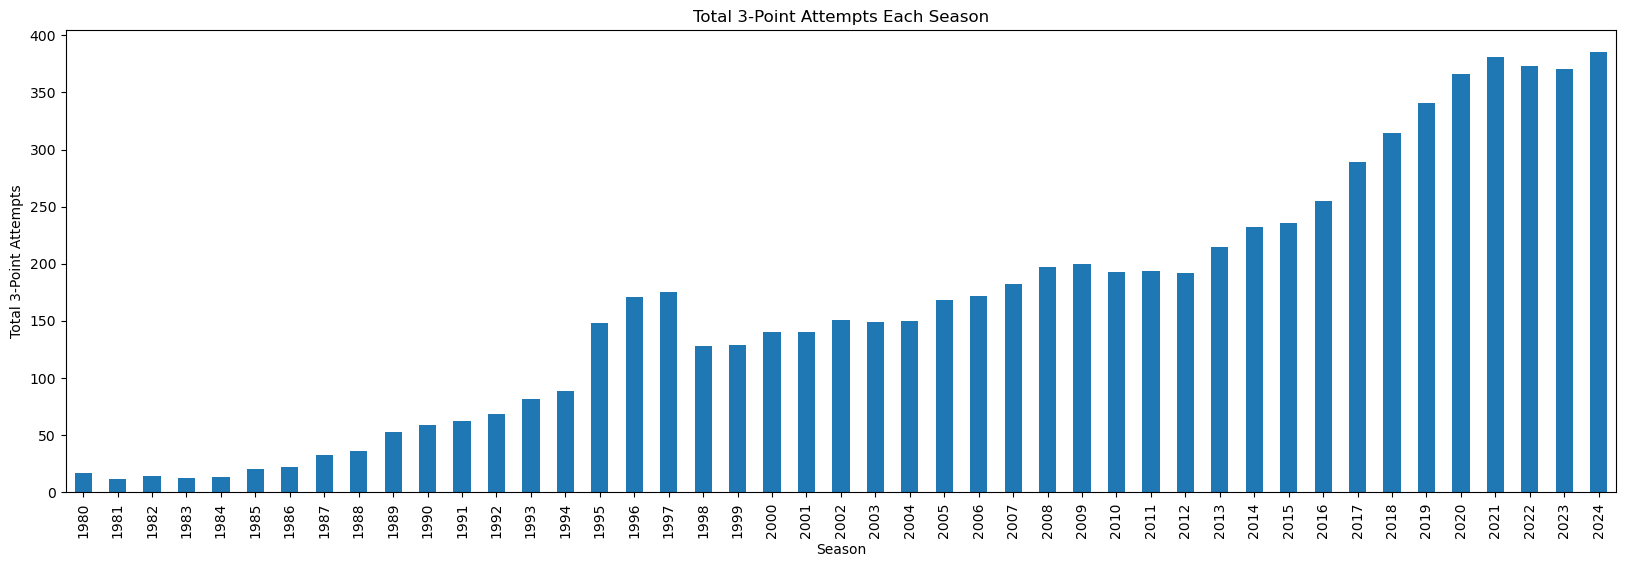

In [18]:
three_point_attempts_per_season = df.groupby('Season')['3P'].sum()

plt.figure(figsize=(20, 6))

three_point_attempts_per_season.plot(kind='bar', xlabel='Season', ylabel='Total 3-Point Attempts', title='Total 3-Point Attempts Each Season')


/Users/cummingshome/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/cummingshome/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/cummingshome/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/cummingshome/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Users/cummingshome/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Users/cummingshome/anaconda3/lib/python

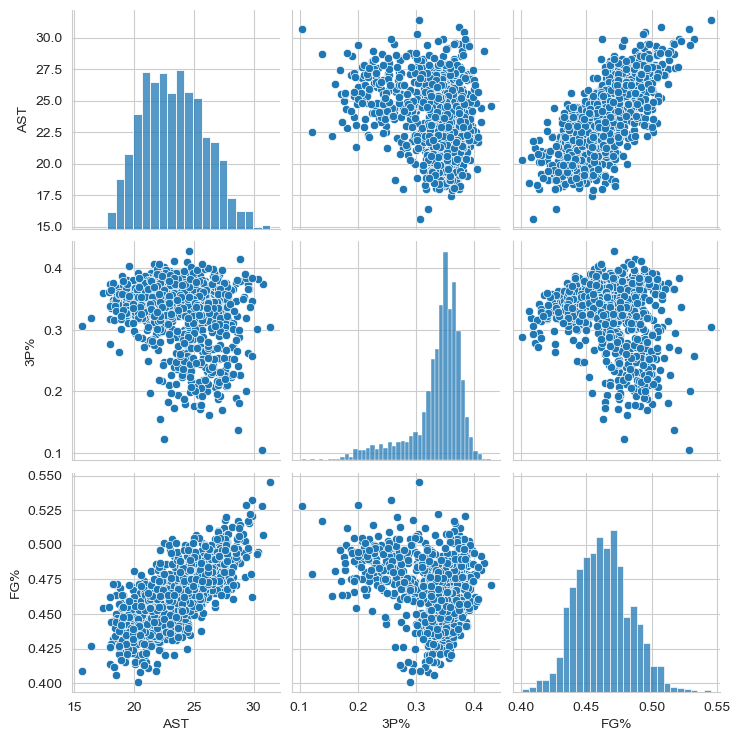

In [19]:
sns.set_style("whitegrid")
sns.pairplot(
    df[["AST", "3P%", "FG%", "Team"]],
    palette = "Set1")

## Machine Learning

In [98]:
data = pd.get_dummies(df)
data.columns

Index(['Season', 'Team ID', 'Conference 5=> rec', 'Conference OR',
       'Conference SRS', 'Conference Age', 'pre playoff odds',
       'pre playoff odds rank', 'pre season odds', 'champion',
       ...
       'Conference/Season_West 2015', 'Conference/Season_West 2016',
       'Conference/Season_West 2017', 'Conference/Season_West 2018',
       'Conference/Season_West 2019', 'Conference/Season_West 2020',
       'Conference/Season_West 2021', 'Conference/Season_West 2022',
       'Conference/Season_West 2023', 'Conference/Season_West 2024'],
      dtype='object', length=2750)

In [1]:
from sklearn.model_selection import train_test_split
